# Zadanie "Transportation problem"
Naszym zadaniem było wykorzystanie metody programowania liniowego do rozwiązania problemu znanego jako "transportation problem". Problem wygląda nastepująco: W dwóch fabrykach X i Y oddalonych od siebie, produkowane są piwa w ilości 20 sztuk w każdej z nich. Produkt musi zostać dostarczony do klientów w różnych ilościach. Koszty transportu są różne w zależności od fabryki i klienta. Naszym celem jest znalezieniu takiego planu dostaw z fabryk X i Y do klientów, który będzie zapewniał najniższy koszt transportu i zarazem spełniał ich zapotrzebowania.
Wizualizacja problemu jest widoczna poniżej.

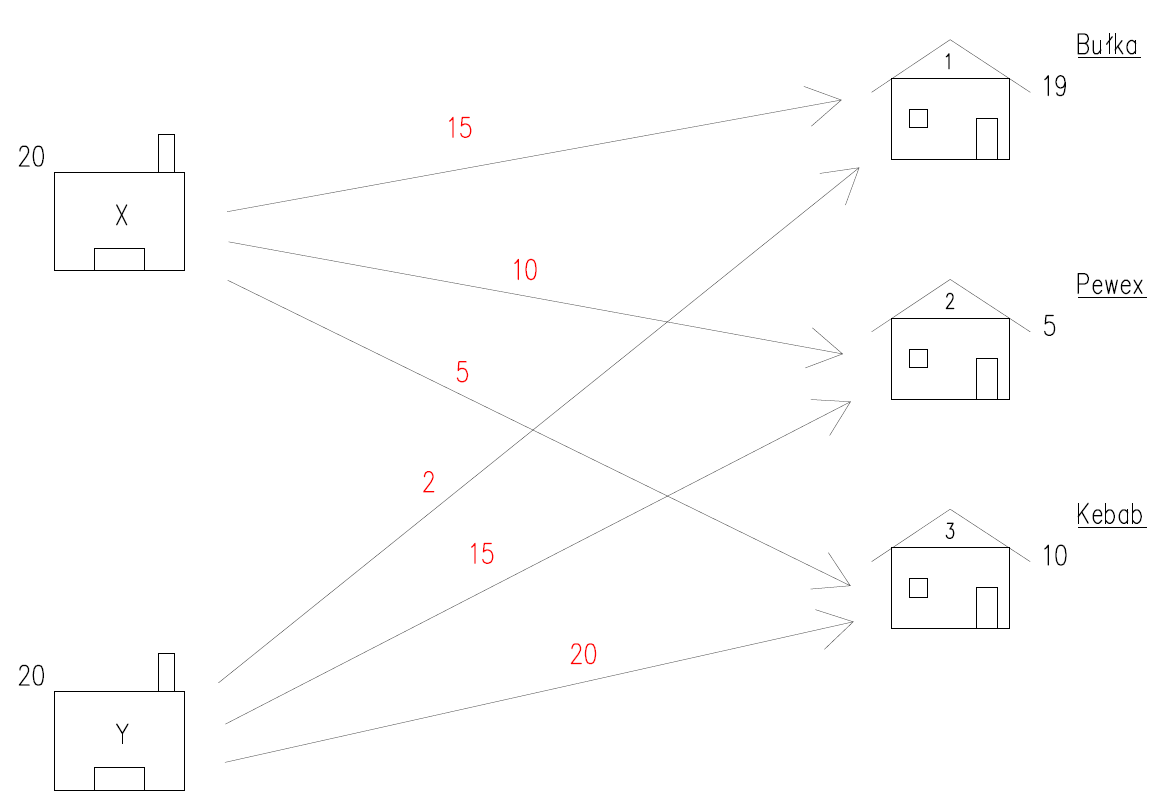

# Podpunkt B
W tym przypadku ilość produkowanych piw przez fabryki X i Y jest mniejsza niż łączne zapotrzebowanie klientów. Wykorzystamy dodatkową fabrykę Z, w której cena transportu będzie bardzo droga, by program brał ją pod uwagę dopiero w przypadku braku dostepości produktów w fabrykach X i Y. Dążmymy do minimalizacji kosztów transportu i spełnienia zapotrzebowania klientów nawet w przypadku, gdy musimy wykorzytac konkurencyjne firmy na rynku.

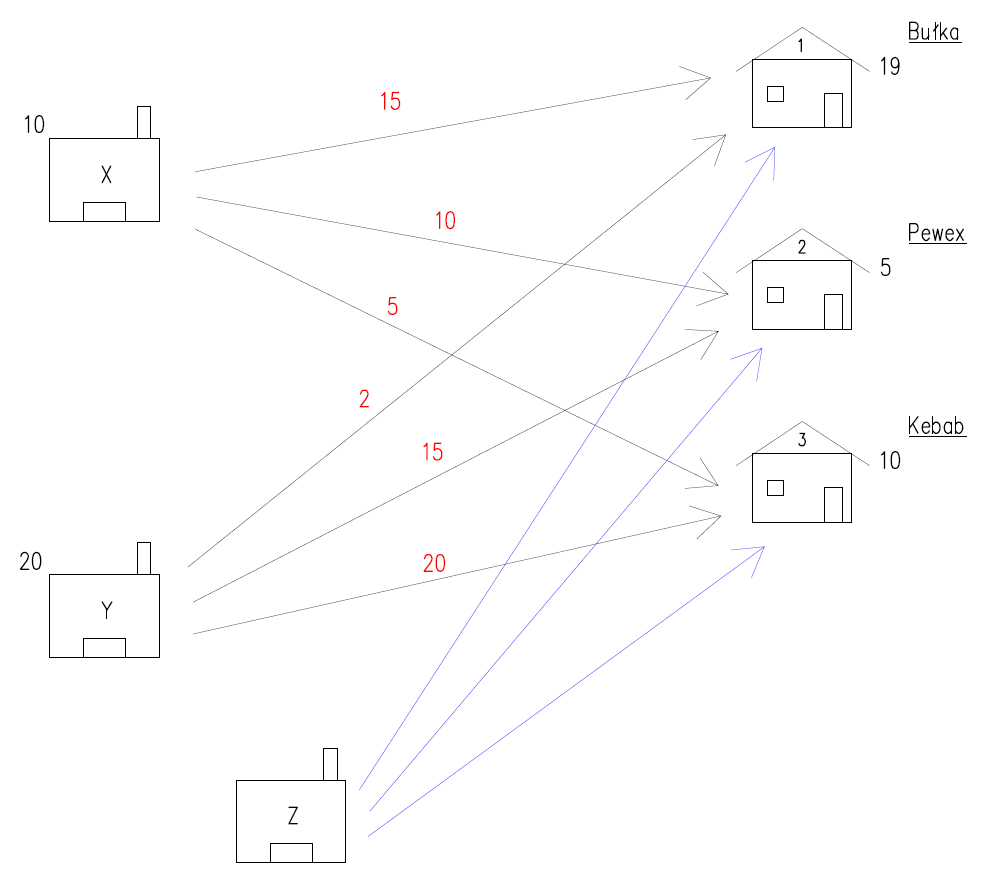

In [5]:
# Rozwiązanie problemu.

# Import bibliotek używanych do rozwiązania problemu.
from pulp import *
import pandas as pd
# Tworzenie problemu i jego minimalizacja.
prob = LpProblem("Transportation Problem",LpMinimize)

# Zmienne związane z problemem.
bar = ["Bułka","Pewex","Kebab","Magazyn"]
koszt = [15,10,5,0,2,15,20,0]
zapotrzebowanie = [19,5,10]

# Zmienne decyzyjne.
prodX = LpVariable("Produkcja browaru X", 0) 
prodY = LpVariable("Produkcja browaru Y", 0) 

# Przypisanie każdej z fabryk transportu do danego klienta.
zmiennaX = []
zmiennaY = []
zmiennaZ = []
for k in bar:
    zmiennaX.append(LpVariable(f"Z_browaru_X_do_baru_{k}",0))
    zmiennaY.append(LpVariable(f"Z_browaru_Y_do_baru_{k}",0))
    zmiennaZ.append(LpVariable(f"Ze_źródła_do_baru_{k}",0))

# Wyznaczenie funkcji celu, która będzie minimalizowana.
zmienna=zmiennaX + zmiennaY
suma = 0
for i in range(len(zmienna)):
    suma += zmienna[i]*koszt[i]
prob += suma

for i in range(len(bar)-1):
    prob+=zmiennaX[i]+zmiennaY[i]+zmiennaZ[i]==zapotrzebowanie[i]
    
# Wprowadzenie ograniczeń i warunków.
prob += sum(zmiennaX) <= prodX
prob += sum(zmiennaY) <= prodY
prob += sum(zmienna) <= prodX + prodY
prob += prodX == 10
prob += prodY == 20
prob += sum(zapotrzebowanie) - prodX - prodY == sum(zmiennaZ)

# Rozwiązywanie problemu.
prob.solve()

# Wyświetlenie statusu rozwiązania na ekranie.
print("Status:", LpStatus[prob.status])

# Wyświetal każdą ze zmiennych z ustaloną optymalną wartością.
for v in prob.variables():
    print(v.name, "=", v.varValue)
# Wyświetlenie zoptymalizowanej wartości kosztu transportu.
print("\nNajniższy koszt transportu {} zł  ".format( value(prob.objective)))

Status: Optimal
Produkcja_browaru_X = 10.0
Produkcja_browaru_Y = 20.0
Z_browaru_X_do_baru_Bułka = 0.0
Z_browaru_X_do_baru_Kebab = 10.0
Z_browaru_X_do_baru_Magazyn = 0.0
Z_browaru_X_do_baru_Pewex = 0.0
Z_browaru_Y_do_baru_Bułka = 19.0
Z_browaru_Y_do_baru_Kebab = 0.0
Z_browaru_Y_do_baru_Magazyn = 0.0
Z_browaru_Y_do_baru_Pewex = 1.0
Ze_źródła_do_baru_Bułka = 0.0
Ze_źródła_do_baru_Kebab = 0.0
Ze_źródła_do_baru_Magazyn = 0.0
Ze_źródła_do_baru_Pewex = 4.0

Najniższy koszt transportu 103.0 zł  
